# Electronic Sales Data

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Emily\OneDrive\Desktop\Online Dataset\Kaggle Dataset\Electronic_sales_Sep2023-Sep2024.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

## NULLs Searching

- There is 1 NULL Value in Gender Column
- There are 4868 NULL Values in Add-ons Purchases

In [3]:
nan_count = df.isna().sum()
nan_count

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

In [4]:
# Investigate why there are NULLs in Add-on Purchase
df[df["Add-ons Purchased"].isna()]

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.0
6,1005,25,Female,No,Smartwatch,SKU1003,3,Completed,Paypal,7603.47,844.83,9,2024-01-30,Overnight,NaN,0.0
9,1006,24,Male,Yes,Laptop,SKU1005,3,Completed,Cash,4175.64,463.96,9,2024-01-01,Express,NaN,0.0
18,1016,61,Male,Yes,Smartphone,SKU1001,5,Completed,Paypal,103.75,20.75,5,2024-07-07,Overnight,NaN,0.0
20,1019,45,Male,No,Smartphone,SKU1001,5,Cancelled,Cash,83.00,20.75,4,2024-03-14,Express,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,19995,69,Female,Yes,Laptop,LTP123,3,Completed,Credit Card,5394.56,674.32,8,2024-08-09,Same Day,NaN,0.0
19994,19996,27,Female,No,Smartphone,SMP234,5,Completed,Credit Card,3419.04,1139.68,3,2024-04-20,Same Day,NaN,0.0
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.0
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.0


In [5]:
# Investigate why there is NULL in Gender
df[df["Gender"].isna()]

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
19999,19998,27,NaN,Yes,Laptop,LTP123,4,Completed,Bank Transfer,674.32,674.32,1,2024-01-29,Expedited,NaN,0.0


## Decision to handle NULL:

- It is usual for any orders that have no Add-On purchases. As a result, I decide to keep all the NULLs in this column
- Since there is only 1 NULL value in Gender, I will also keep it. However, if we do we analysis related to it, we will remove it. 

## Build a Box Plot to identify OUTLIERS in Total Price:

Total Price Maximum: 11396.8
Total Price Minimum: 20.75
Total Price Median: 2534.49


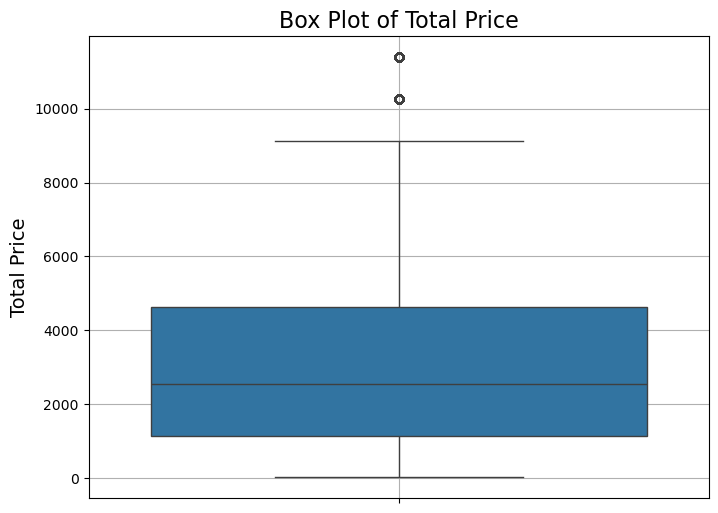

In [6]:
total_price_max = df["Total Price"].max()
total_price_min = df["Total Price"].min()
total_price_median = df["Total Price"].median()
print("Total Price Maximum: {0}".format(total_price_max))
print("Total Price Minimum: {0}".format(total_price_min))
print("Total Price Median: {0}".format(total_price_median))

# Set the plot size
plt.figure(figsize=(8, 6))

# Create the box plot for 'Total Price'
sns.boxplot(data=df, y="Total Price")

# Add a title and labels
plt.title("Box Plot of Total Price", fontsize=16)
plt.ylabel("Total Price", fontsize=14)
plt.grid(True)

# Display the plot
plt.show()

In [7]:
# Calculate the IQR
Q1 = df["Total Price"].quantile(0.25)
Q3 = df["Total Price"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(Q1)
print(Q3)
print(IQR)
print(lower_bound)
print(upper_bound)

# Filter outliers
outliers = df[(df["Total Price"] < lower_bound) | (df["Total Price"] > upper_bound)]

df = df[(df["Total Price"] >= lower_bound) & (df["Total Price"] <= upper_bound)]

1139.68
4639.6
3499.92
-4110.2
9889.48


## Decisions after looking at BOX PLOT:
- Total Price is skewing to the right or upper of the BOX PLOT. 50% of Orders are having Total Price from 2534.49 to 11396.8
- I decide to remove the Outliers. Although they look like regular orders with higher price, I want to improve the accuracy with my skewing results, centrailize the data. Later on, it can remove overfitting or underfitting and improve the performance of my future models.

### Total Price Distribution

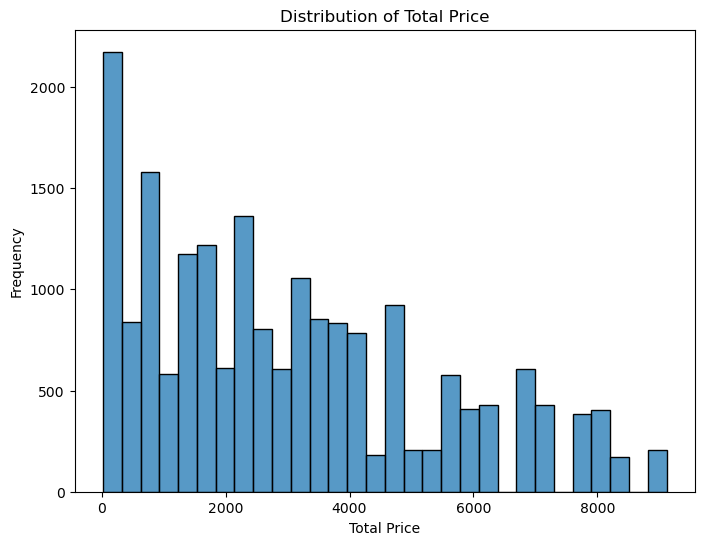

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Total Price"], bins=30)
plt.title("Distribution of Total Price")
plt.xlabel("Total Price")
plt.ylabel("Frequency")
plt.show()

### What is the most selling Product Type? 
- Smart Phone 
- Smart Watch

In [9]:
df.groupby('Product Type')['Total Price'].sum()

Product Type
Headphones     4041400.24
Laptop        12296239.97
Smartphone    17360341.73
Smartwatch    14036273.06
Tablet        11712000.41
Name: Total Price, dtype: float64

### Box Plot of Total Price by Product Type:

- Comparing the box plot between Product Type
- Smart Watch median is highest. Orders with Smartwatch is usually higher than others 

C:\Users\Emily\AppData\Local\Temp\ipykernel_91408\1499126828.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product Type', y='Total Price', data=df, palette="Set1")


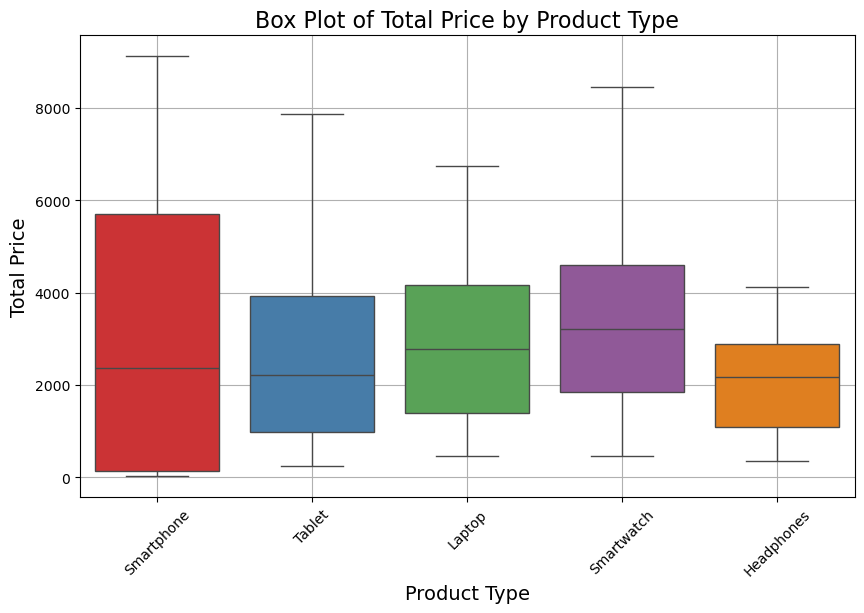

In [10]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create a box plot of 'Total Price' grouped by 'Product Type'
sns.boxplot(x='Product Type', y='Total Price', data=df, palette="Set1")

# Add a title and labels
plt.title('Box Plot of Total Price by Product Type', fontsize=16)
plt.xlabel('Product Type', fontsize=14)
plt.ylabel('Total Price', fontsize=14)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.grid(True)
plt.show()

### How many products are sold ? 

In [11]:
count_product_type = df.groupby(['Product Type']).size().sort_values()
count_product_type

Product Type
Headphones    2011
Smartwatch    3934
Laptop        3973
Tablet        4104
Smartphone    5595
dtype: int64

### Average Price for each Product Type

In [12]:
avg_price_by_product_type = df.groupby(['Product Type'])['Total Price'].mean().sort_values()
avg_price_by_product_type

Product Type
Headphones    2009.647061
Tablet        2853.801269
Laptop        3094.950911
Smartphone    3102.831408
Smartwatch    3567.939263
Name: Total Price, dtype: float64

### Comparison between Quantity order and Total Price for each Product 
- Highest AVG Price is from Smartwatch. Prove that order with smartwatch usually highest
- Highest quantity is from Smart Phone.
- Smart Watch bring the most value since it does not have to be sold a lot but when it does, the total price surely very high

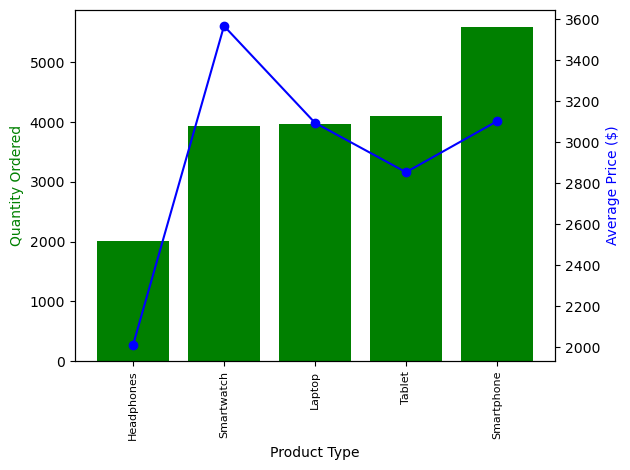

In [13]:
# Extract the product types and their respective counts and average prices
products = count_product_type.index  # The 'Product Type' categories
quantities_ordered = count_product_type.values  # The counts of each product type
prices = avg_price_by_product_type.reindex(products).values  # The mean prices aligned with product types

# Create a figure and twin axes for bar and line plot
fig, ax1 = plt.subplots()

# Create a bar plot for product quantities
ax1.bar(products, quantities_ordered, color='g')

# Create a twin axes to plot the average prices
ax2 = ax1.twinx()
ax2.plot(products, prices, color='b', marker='o')

# Set labels for both axes
ax1.set_xlabel('Product Type')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Average Price ($)', color='b')

# Rotate x-axis labels for readability
ax1.set_xticks(range(len(products)))  # Set the positions of ticks
ax1.set_xticklabels(products, rotation='vertical', size=8)  # Label the ticks

# Show the figure
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

### What products are usually sold together ? 

- SmartPhone usually bought together
- Smart Phone and Tablet
- Smart Phone and Smart Watch

In [14]:
df['Grouped'] = df.groupby('Customer ID')['Product Type'].transform(lambda x: ','.join(x))

grouped_table = df[['Customer ID','Grouped']].drop_duplicates() # Dropping out duplicate rows

grouped_table = grouped_table[grouped_table['Grouped'].str.contains(',', na=False)]

grouped_table.groupby(['Grouped']).size().sort_values(ascending=False).head(20)

Grouped
Smartphone,Smartphone    335
Tablet,Smartphone        235
Smartphone,Tablet        225
Smartwatch,Smartphone    208
Smartphone,Smartwatch    206
Laptop,Smartphone        199
Smartphone,Laptop        194
Tablet,Smartwatch        167
Laptop,Smartwatch        162
Laptop,Tablet            161
Tablet,Tablet            161
Tablet,Laptop            160
Laptop,Laptop            158
Smartwatch,Smartwatch    150
Smartwatch,Tablet        144
Smartwatch,Laptop        131
Tablet,Headphones         85
Headphones,Smartwatch     85
Headphones,Tablet         80
Headphones,Laptop         79
dtype: int64

## Data Cleaning and Data Processing

### Update Paypal to PayPal to follow nameing pattern

In [15]:

#set(df['Product Type'])

df['Payment Method'] = df['Payment Method'].replace('Paypal', 'PayPal')
set(df['Payment Method'])


{'Bank Transfer', 'Cash', 'Credit Card', 'Debit Card', 'PayPal'}

### Convert Categorical Value into Numerical  

In [16]:
df_copy = df.copy()

df_copy['Gender'] = df_copy['Gender'].replace('Male', 1)
df_copy['Gender'] = df_copy['Gender'].replace('Female', 0)

df_copy['Loyalty Member'] = df_copy['Loyalty Member'].replace('Yes', 1)
df_copy['Loyalty Member'] = df_copy['Loyalty Member'].replace('No', 0)

df_copy['Order Status'] = df_copy['Order Status'].replace('Completed', 1)
df_copy['Order Status'] = df_copy['Order Status'].replace('Cancelled', 0)

df_copy['Payment Method'] = df_copy['Payment Method'].replace('Bank Transfer', 0)
df_copy['Payment Method'] = df_copy['Payment Method'].replace('Cash', 0)
df_copy['Payment Method'] = df_copy['Payment Method'].replace('Credit Card', 0)
df_copy['Payment Method'] = df_copy['Payment Method'].replace('Debit Card', 0)
df_copy['Payment Method'] = df_copy['Payment Method'].replace('PayPal', 0)

C:\Users\Emily\AppData\Local\Temp\ipykernel_91408\2991290635.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Gender'] = df_copy['Gender'].replace('Female', 0)
C:\Users\Emily\AppData\Local\Temp\ipykernel_91408\2991290635.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Loyalty Member'] = df_copy['Loyalty Member'].replace('No', 0)
C:\Users\Emily\AppData\Local\Temp\ipykernel_91408\2991290635.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retai

### Picked only column that is necessary for modeling

In [17]:
picked_data = df_copy[['Age', 'Gender', 'Rating',  'Total Price', 'Quantity', 'Loyalty Member', 'Order Status']]
picked_data.shape

(19617, 7)

### Pick a sample from our chosen data 30%

In [18]:
sample_data = picked_data.sample(frac=0.3, random_state=1)
sample_data

,Age,Gender,Rating,Total Price,Quantity,Loyalty Member,Order Status
4765,41,0.0,3,1391.88,3,0,1
5794,47,1.0,5,207.50,10,0,1
4641,46,0.0,3,4639.60,10,0,1
942,79,1.0,3,8448.30,10,0,0
12150,51,1.0,4,1444.72,4,1,0
...,...,...,...,...,...,...,...
7511,27,1.0,2,6329.52,8,0,0
1885,63,0.0,5,20.75,1,1,1
2899,58,1.0,3,1976.24,8,0,0
8035,33,1.0,3,5068.98,6,0,1


# 80/20 TRAINING
# 10/10 Valid and Test

In [19]:
# Calculate the split index for the training set
split_index = int(len(sample_data) * 0.8)
split_index

# Split the sample data into training and remaining data
train_data = sample_data.iloc[:split_index]
valid_and_test_data = sample_data.iloc[split_index:]


# Calculate the split index for validation and test data
split_index_1 = int(len(valid_and_test_data) * 0.5)
split_index_1

# Split the remaining data into validation and test sets
valid_data = valid_and_test_data.iloc[:split_index_1]
test_data = valid_and_test_data.iloc[split_index_1:]

test_data


,Age,Gender,Rating,Total Price,Quantity,Loyalty Member,Order Status
7316,74,0.0,3,463.96,1,0,0
7134,66,1.0,3,5913.81,7,0,1
4738,63,0.0,3,8448.30,10,0,1
4177,64,0.0,3,7603.47,9,1,1
13734,59,1.0,1,2297.50,5,1,1
...,...,...,...,...,...,...,...
7511,27,1.0,2,6329.52,8,0,0
1885,63,0.0,5,20.75,1,1,1
2899,58,1.0,3,1976.24,8,0,0
8035,33,1.0,3,5068.98,6,0,1


# SVM to predict Order Status Cancelled or Not

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Values of C to test
# find best-performing SVM model on validation data
amounts = [0.001, 0.01, 1, 10] 
acc = np.zeros(4)  # Initialize accuracy array for SVM models

# Standardizing the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data.iloc[:, :6])  # First 6 columns are features
y_train = train_data.iloc[:, 6].astype('category')   # 7th column is the factor

# Validation data needs to be scaled using the same scaler
X_validate = scaler.transform(valid_data.iloc[:, :6])
y_validate = valid_data.iloc[:, 6].astype('category')

# Train SVM models and evaluate
for i in range(len(amounts)):
    model = SVC(C=amounts[i], kernel='sigmoid')  # Use sigmoid
    model.fit(X_train, y_train)
    
    # Make predictions on validation set
    pred = model.predict(X_validate)
    
    # Calculate accuracy
    acc[i] = accuracy_score(y_validate, pred)

acc[:4]


array([0.66326531, 0.66326531, 0.52210884, 0.53401361])

In [68]:
best_model_index = np.argmax(acc[:4])
best_C_value = amounts[best_model_index]
best_accuracy = acc[best_model_index]

# Retrain the best model on the training data
model_scaled = SVC(C=best_C_value, kernel='sigmoid')
model_scaled.fit(X_train, y_train)

# Prepare test data
X_test = scaler.transform(test_data.iloc[:, :6])
y_test = test_data.iloc[:, 6].astype('category')

# Performance on test data
test_predictions = model_scaled.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Performance on test data = {test_accuracy}")
print(f"Best Model: {model_scaled}")


Performance on test data = 0.6587436332767402
Best Model: SVC(C=0.001, kernel='sigmoid')


In [69]:
# Standardizing the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data.iloc[:, :6])  # First 6 columns are features
y_train = train_data.iloc[:, 6].astype('category')   # 7th column is the factor

# Validation data needs to be scaled using the same scaler
X_validate = scaler.transform(valid_data.iloc[:, :6])
y_validate = valid_data.iloc[:, 6].astype('category')

# Train SVM models and evaluate
for i in range(len(amounts)):
    model = SVC(C=amounts[i], kernel='linear')  # Use linear
    model.fit(X_train, y_train)
    
    # Make predictions on validation set
    pred = model.predict(X_validate)
    
    # Calculate accuracy
    acc[i] = accuracy_score(y_validate, pred)

acc[:4]



array([0.66326531, 0.66326531, 0.66326531, 0.66326531])

In [70]:
best_model_index = np.argmax(acc[:4])
best_C_value = amounts[best_model_index]
best_accuracy = acc[best_model_index]

# Retrain the best model on the training data
model_scaled = SVC(C=best_C_value, kernel='linear')
model_scaled.fit(X_train, y_train)

# Prepare test data
X_test = scaler.transform(test_data.iloc[:, :6])
y_test = test_data.iloc[:, 6].astype('category')

# Performance on test data
test_predictions = model_scaled.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Performance on test data = {test_accuracy}")
print(f"Best Model: {model_scaled}")

Performance on test data = 0.6587436332767402
Best Model: SVC(C=0.001, kernel='linear')


Sometime, simple linear kernel will not work great to predict and classify datapoints. We should try other methods like Poly, Sigmoid, RBF. 
In this example, I have tried using sigmoid and my result is the same.  

# Using train.kknn 

### This method uses n-fold cross-validation, where n is the number
### of data points, because that's how train.kknn does
### cross validation.  It's also called "leave-one-out" cross
### validation.

In [23]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize accuracy array for KNN models
acc1 = np.zeros(20)  # Size to accommodate KNN models

# Train KNN models
for k in range(1, 21):  # K values from 1 to 20
    # Fit k-nearest-neighbor model using training set
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(train_data.iloc[:, :6], train_data.iloc[:, 6])  # First 6 columns are features, 7th column is the target
    
    # Make predictions on the validation set
    pred = knn_model.predict(valid_data.iloc[:, :6])  # Use validation set features
    
    # Calculate accuracy
    acc1[k-1] = accuracy_score(valid_data.iloc[:, 6], pred)  # Calculate accuracy on validation set

# Display accuracy for KNN models
print(acc1)

# Find the best-performing KNN model on validation data
best_knn_index = np.argmax(acc1)  # Get the index of the best KNN model
best_knn_value = acc1[best_knn_index]

print(f"Best KNN model is k={best_knn_index + 1}")  # K index in range 1-20
print(f"Best validation set correctness is {best_knn_value}")

# Run the best model on the test data
best_k = best_knn_index + 1  # Get the best k value
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(train_data.iloc[:, :6], train_data.iloc[:, 6])  # Fit on training data

# Make predictions on the test set
test_pred = knn_model.predict(test_data.iloc[:, :6])  # Use test set features
test_accuracy = accuracy_score(test_data.iloc[:, 6], test_pred)

print(f"Performance on test data = {test_accuracy}")


[0.57653061 0.47278912 0.58673469 0.5255102  0.60204082 0.56292517
 0.59693878 0.57993197 0.63095238 0.60714286 0.6292517  0.61054422
 0.64965986 0.62414966 0.64795918 0.63945578 0.64965986 0.63435374
 0.65646259 0.64285714]
Best KNN model is k=19
Best validation set correctness is 0.6564625850340136
Performance on test data = 0.6536502546689303


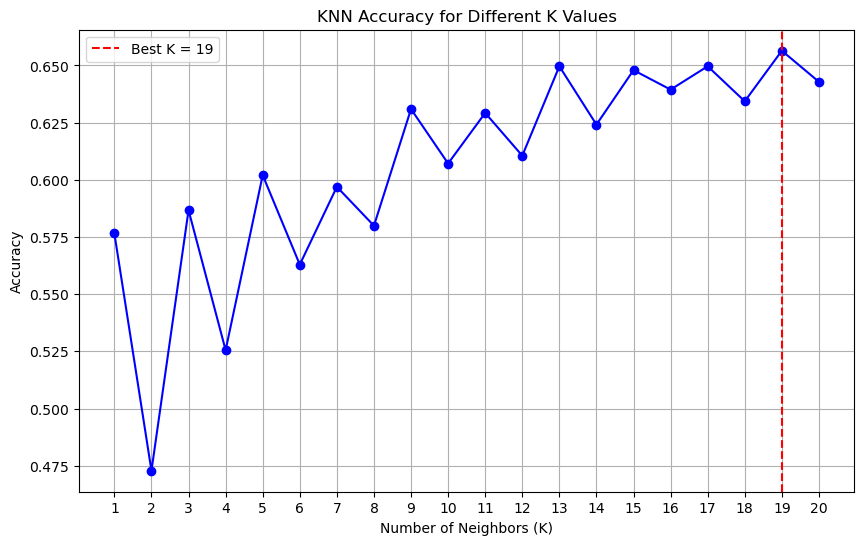

In [24]:
import matplotlib.pyplot as plt

# Plotting accuracy against K values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), acc1, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))  # Set x-ticks to show all K values
plt.grid(True)
plt.axvline(x=best_knn_index + 1, color='r', linestyle='--', label=f'Best K = {best_knn_index + 1}')
plt.legend()
plt.show()

## exponential smoothing forecast

In [27]:

# Loyalty member and Order status Complete

filtered_df = df[ (df["Loyalty Member"] == "Yes") & 
                 (df["Order Status"] == "Completed")]

filtered_df = filtered_df[[ 'Purchase Date', 'Total Price']]

# Ensure 'Purchase Date' is in datetime format
filtered_df['Purchase Date'] = pd.to_datetime(filtered_df['Purchase Date'])

# Extract the month (and year if needed) from 'Purchase Date' as period (YYYY-MM)
filtered_df['Month'] = filtered_df['Purchase Date'].dt.to_period('M')

# Display the updated DataFrame
filtered_df



,Purchase Date,Total Price,Month
3,2024-08-09,3164.76,2024-08
4,2024-05-21,41.50,2024-05
9,2024-01-01,4175.64,2024-01
10,2024-06-25,2470.30,2024-06
16,2024-05-18,4747.14,2024-05
...,...,...,...
19964,2024-04-11,3250.62,2024-04
19974,2024-06-03,4045.92,2024-06
19988,2024-09-08,9117.44,2024-09
19991,2024-08-09,5394.56,2024-08


In [28]:
avg_price_month = filtered_df.groupby(['Month'])['Total Price'].mean().sort_index()
avg_price_month

# Convert the result to a DataFrame
avg_price_month_df = avg_price_month.reset_index()

# Display the result
avg_price_month_df

,Month,Total Price
0,2023-09,2150.235172
1,2023-10,2675.686667
2,2023-11,2370.493269
3,2023-12,2581.625378
4,2024-01,2738.981043
5,2024-02,2988.179593
6,2024-03,2977.563869
7,2024-04,3348.412811
8,2024-05,3123.499472
9,2024-06,3021.055631


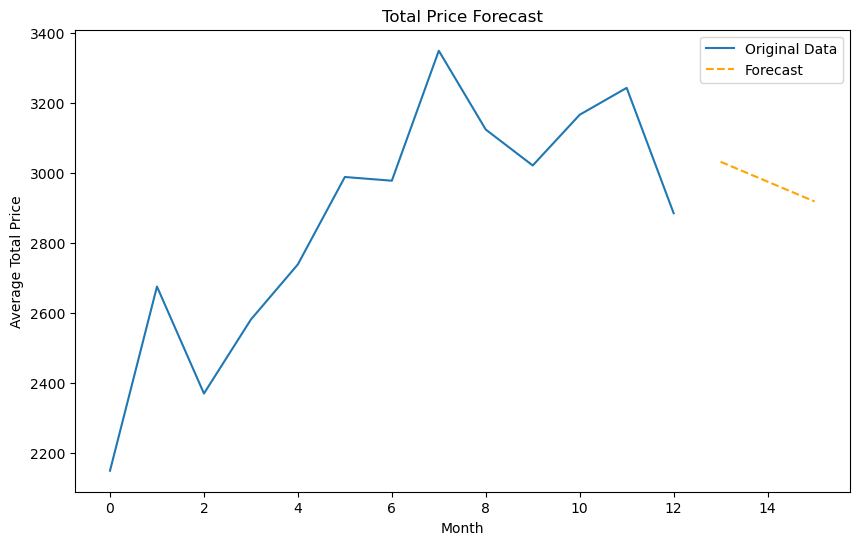

13    3031.573880
14    2974.949852
15    2918.325825
dtype: float64


In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Apply Holt's Linear Trend Model (No Seasonality)
model = ExponentialSmoothing(avg_price_month_df['Total Price'], trend='add')
fit_model = model.fit()

# Forecast the next 3 months
forecast = fit_model.forecast(steps=3)


# Plot the original data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(avg_price_month_df['Total Price'], label='Original Data')
plt.plot(forecast, label='Forecast', linestyle='--', color='orange')
plt.title('Total Price Forecast')
plt.xlabel('Month')
plt.ylabel('Average Total Price')
plt.legend()
plt.show()

# Print the forecasted values
print(forecast)


### Using the Data since September 2023, including the trend from previous months, I predict there is a downtrend coming up for the next 3 months in our average monthly sell

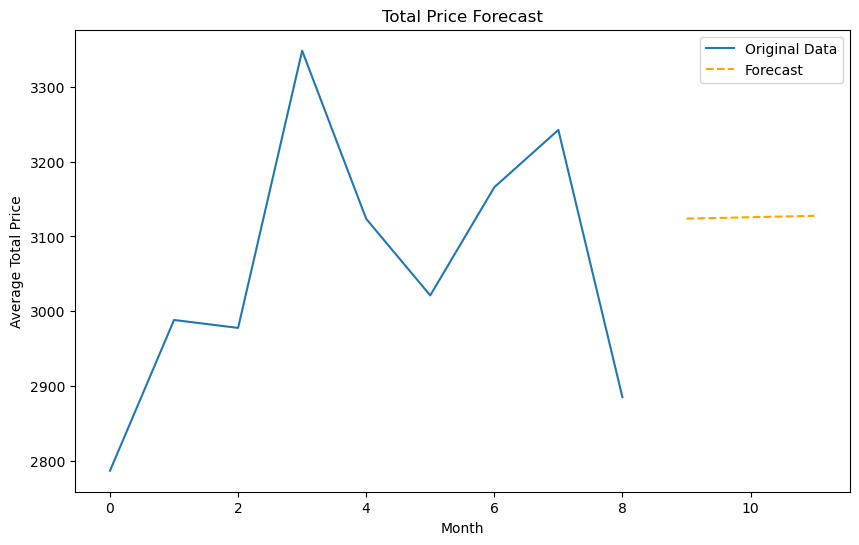

9     3123.772997
10    3125.652670
11    3127.532342
dtype: float64


In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Loyalty member and Order status Complete

filtered_df = df[ ( df["Purchase Date"] >= "2024-01-1") &
                (df["Loyalty Member"] == "Yes") & 
                 (df["Order Status"] == "Completed")]

filtered_df = filtered_df[[ 'Purchase Date', 'Total Price']]

# Ensure 'Purchase Date' is in datetime format
filtered_df['Purchase Date'] = pd.to_datetime(filtered_df['Purchase Date'])

# Extract the month (and year if needed) from 'Purchase Date' as period (YYYY-MM)
filtered_df['Month'] = filtered_df['Purchase Date'].dt.to_period('M')

# Display the updated DataFrame
filtered_df

avg_price_month = filtered_df.groupby(['Month'])['Total Price'].mean().sort_index()
avg_price_month

# Convert the result to a DataFrame
avg_price_month_df = avg_price_month.reset_index()

# Display the result
avg_price_month_df

# Apply Holt's Linear Trend Model (No Seasonality)
model = ExponentialSmoothing(avg_price_month_df['Total Price'], trend='add',  seasonal=None)
fit_model = model.fit()

# Forecast the next 3 months
forecast = fit_model.forecast(steps=3)


# Plot the original data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(avg_price_month_df['Total Price'], label='Original Data')
plt.plot(forecast, label='Forecast', linestyle='--', color='orange')
plt.title('Total Price Forecast')
plt.xlabel('Month')
plt.ylabel('Average Total Price')
plt.legend()
plt.show()

# Print the forecasted values
print(forecast)


### However, if we are using only 2024 data, we can predict that there is a slightly uptrend for the next 3 months. 

### Short-term data: Exponential smoothing is highly effective due to its ability to focus on recent observations.

### Basic exponential smoothing models (like Simple Exponential Smoothing) assume no trend or seasonality in the data. This assumption works well for short-term forecasting. However, for longer datasets, you may have trends or seasonal patterns that are better captured by more advanced methods, like Holt’s linear trend method (for trends) or Holt-Winters exponential smoothing (for seasonality and trends).

# LOGISTIC REGRESSION

In [71]:
df_copy.head()
picked_data = df_copy[['Total Price', 'Order Status']].dropna()
picked_data.head()

,Total Price,Order Status
0,5538.33,0
1,741.09,1
2,1855.84,1
3,3164.76,1
4,41.50,1


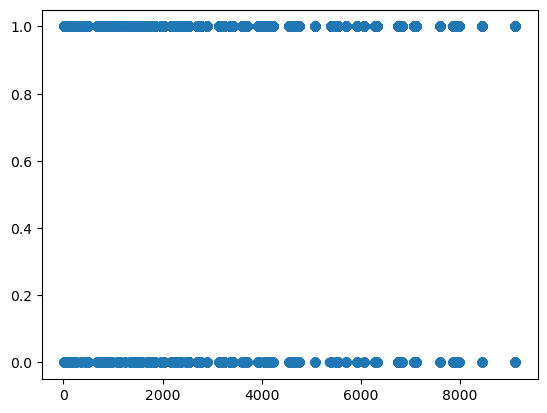

In [32]:
plt.scatter(picked_data["Total Price"], picked_data["Order Status"])

<Axes: xlabel='Order Status', ylabel='count'>

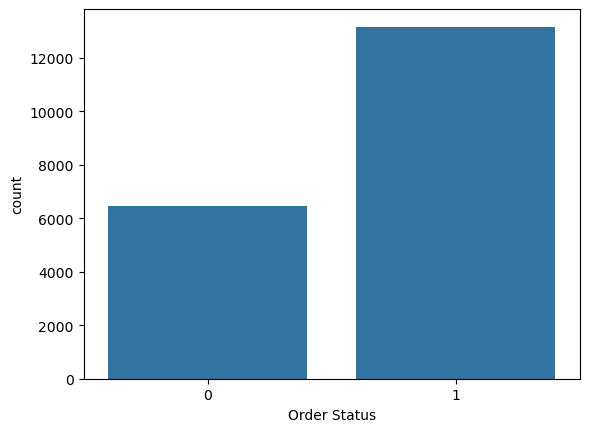

In [33]:
sns.countplot(x = "Order Status", data = picked_data)

In [34]:

X = picked_data.iloc[:, :1].dropna()

# Select the 2th column (index 1) from df
y = df.iloc[:, 1]


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 11)


In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_prediction = model.predict(X_test)

In [38]:
model.score(X_test, y_test)

0.018858307849133536

### Log Regression has a Very bad prediction. Only 0.12 % accurate. Not a great model to use.

# DECISION TREE

In [39]:
picked_data = df_copy[['Age', 'Gender', 'Rating',  'Total Price', 'Quantity', 'Loyalty Member', 'Order Status']]
picked_data.head()

,Age,Gender,Rating,Total Price,Quantity,Loyalty Member,Order Status
0,53,1.0,2,5538.33,7,0,0
1,53,1.0,3,741.09,3,0,1
2,41,1.0,3,1855.84,4,0,1
3,41,1.0,2,3164.76,4,1,1
4,75,1.0,5,41.50,2,1,1


In [40]:
X = picked_data.iloc[:,:7].dropna()
X.shape

y = df.iloc[:, 7].dropna()

# Randomly select one row index to drop
random_index = np.random.choice(y.index)

# Drop the randomly selected row
y = y.drop(random_index)
y.shape


(19616,)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 11, test_size = 0.3)

In [42]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [43]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [44]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
y_prediction = dtc.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_prediction)

array([[1519,  443],
       [ 444, 3479]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

   Cancelled       0.77      0.77      0.77      1962
   Completed       0.89      0.89      0.89      3923

    accuracy                           0.85      5885
   macro avg       0.83      0.83      0.83      5885
weighted avg       0.85      0.85      0.85      5885



In [48]:
dtc.feature_importances_
# How important each Features are

array([0.16209181, 0.02768375, 0.0282106 , 0.09310509, 0.03939958,
       0.02185138, 0.62765779])

In [49]:
X.columns

Index(['Age', 'Gender', 'Rating', 'Total Price', 'Quantity', 'Loyalty Member',
       'Order Status'],
      dtype='object')

In [50]:
features = pd.DataFrame(dtc.feature_importances_, index = X.columns)
features

,0
Age,0.162092
Gender,0.027684
Rating,0.028211
Total Price,0.093105
Quantity,0.039400
Loyalty Member,0.021851
Order Status,0.627658


In [51]:
dtc2 = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = .04)

dtc2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy')

In [52]:
y_prediction2 = dtc2.predict(X_test)

In [53]:
confusion_matrix(y_test, y_prediction2)

array([[1680,  282],
       [ 250, 3673]], dtype=int64)

In [54]:
print(classification_report(y_test, y_prediction2))

              precision    recall  f1-score   support

   Cancelled       0.87      0.86      0.86      1962
   Completed       0.93      0.94      0.93      3923

    accuracy                           0.91      5885
   macro avg       0.90      0.90      0.90      5885
weighted avg       0.91      0.91      0.91      5885



1. Accuracy (0.91):
    - This shows that the model correctly classified 91% of all instances in the dataset.

2. Macro Average (macro avg):
    - Precision (0.90), Recall (0.90), F1-Score (0.90): 
        This is the unweighted mean of the individual class metrics. It treats both classes equally, regardless of the class size.
3. Weighted Average (weighted avg):
   - Precision (0.91), Recall (0.91), F1-Score (0.91):
        This is the mean of the individual class metrics, weighted by the number of instances in each class (support). It accounts for class imbalance.